#  Preping data and intervariable correlations

In [14]:
### Libraries for data exploration ###

import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir(b"C:\Users\EDDAHABI\Documents\GitHub\ProjetISA")
df = pd.read_csv('Code +Data/TrainSample.csv' ,sep=';' , decimal=',')
df.head()


,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
0,661,0.429600,-0.193201,01/06/2013,21/03/2014,08/05/2014,-1.124200,-0.214336,-1.262296,-0.153197,...,0.635528,-0.067825,0.069978,-0.253698,-1.253690,0.181738,0.979100,-0.184434,-0.323593,-0.659768
1,523,-0.082672,-0.539854,31/08/2014,17/02/2015,03/08/2015,1.286521,0.870034,0.717834,0.674376,...,-1.364776,0.835789,1.136126,0.995649,0.667339,-0.560750,1.999634,-1.225036,-0.356343,1.782547
2,703,-0.457415,-0.082104,04/11/2013,08/07/2014,30/07/2014,-0.781945,0.511093,0.592495,-0.937430,...,0.667127,-0.287786,0.979602,-0.386425,-1.253690,0.181738,-0.492791,-0.181300,-1.067145,0.283035
3,473,0.376282,-0.310432,24/11/2011,11/05/2012,13/07/2012,-0.442801,0.025900,-1.093255,0.164815,...,0.033723,-1.034051,-1.342103,-1.546778,-0.293176,-1.303237,-0.295062,2.135885,-0.734454,-0.328650
4,309,-0.113110,-0.111412,20/11/2014,07/04/2015,23/07/2015,0.258511,0.190913,1.229474,-0.347126,...,-0.868364,0.923707,1.470667,0.561383,0.667339,-0.560750,2.034630,-1.226546,-0.271119,0.975603


In [3]:
df.describe()

,API,Surf_X,Surf_Y,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),TOC_PPLS (%),Vcarb_PPLS,Vsand_PPLS,...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,451.000000,460.000000,460.000000,460.000000,...,362.000000,332.000000,357.000000,361.000000,362.000000,362.000000,362.000000,363.000000,460.000000,460.000000
mean,408.271739,0.048312,-0.020504,-0.038670,-0.020932,-0.044322,0.032553,0.027042,0.009838,-0.018139,...,-0.000074,-0.007804,0.043509,-0.001943,0.053141,-0.007765,-0.020633,0.063128,-0.004878,-0.011122
std,228.391358,0.972776,0.974876,0.982085,0.947728,0.992127,0.983659,0.995567,1.032273,1.026098,...,0.956717,0.973805,1.032365,1.074640,1.009530,0.797089,0.987912,1.047143,1.015833,0.986570
min,1.000000,-2.426259,-2.740075,-2.325205,-2.958958,-2.135948,-3.287442,-2.169983,-3.404962,-2.125431,...,-1.576223,-6.253073,-2.784977,-2.916152,-1.693075,-1.320112,-1.959572,-1.647296,-1.241844,-0.846812
25%,206.750000,-0.377085,-0.631271,-0.723762,-0.675256,-0.854066,-0.596984,-0.593362,-0.294986,-0.718530,...,-0.637123,-0.668154,-0.622318,-0.427222,-1.163446,-0.560750,-0.533204,-0.384367,-0.670713,-0.762137
50%,412.000000,0.149286,-0.034792,-0.394263,-0.008885,-0.031200,0.177588,0.324258,0.245879,-0.190943,...,0.216815,0.079044,0.198764,0.176120,0.667339,0.159425,-0.486552,-0.178793,-0.354850,-0.269251
75%,609.250000,0.511680,0.622794,0.578986,0.612669,0.845490,0.659758,0.753375,0.786744,0.512507,...,0.489761,0.669197,0.788128,0.633616,0.667339,0.181738,0.153346,0.435225,0.443100,0.317948
max,793.000000,2.869421,3.143658,3.480066,3.885516,1.987123,1.862078,1.860650,1.868475,3.326308,...,13.261381,3.052486,2.214658,9.119090,2.588369,3.488558,4.769556,4.610967,5.366269,5.527111


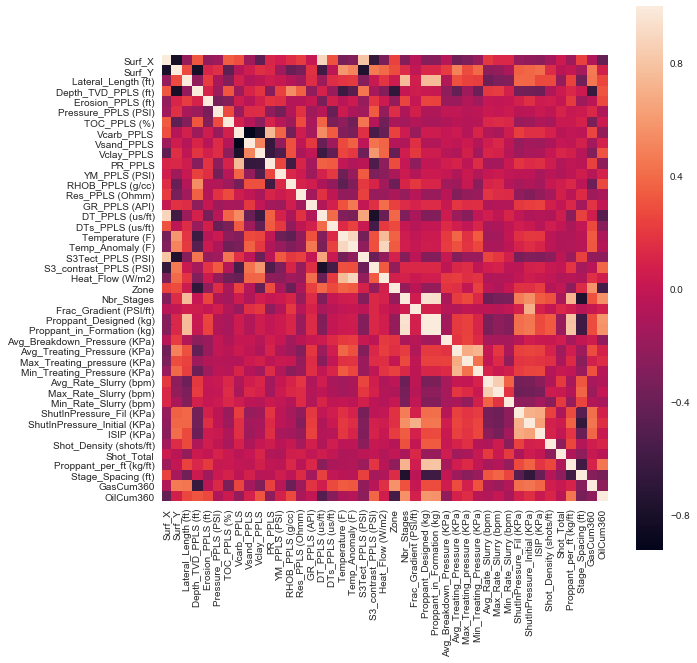

In [15]:
# Let's now look at the correlations between variables 

fig = plt.figure(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
, vmax=1, squar=True)

# This will definitely help us when predicting a value of a variable using another one from a correlated variable to the first one (using a linear regression for instance). 

# Data processing - Outliers and missing values

In [19]:
 dfSep = pd.read_csv('./Seperated_Data/data_all_features.csv')
 dfSep.head()

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
0,661,0.429600,-0.193201,01/06/2013,21/03/2014,08/05/2014,-1.124200,-0.214336,-1.262296,-0.153197,...,0.635528,-0.067825,0.069978,-0.253698,-1.253690,0.181738,0.979100,-0.184434,-0.323593,-0.659768
1,523,-0.082672,-0.539854,31/08/2014,17/02/2015,03/08/2015,1.286521,0.870034,0.717834,0.674376,...,-1.364776,0.835789,1.136126,0.995649,0.667339,-0.560750,1.999634,-1.225036,-0.356343,1.782547
2,703,-0.457415,-0.082104,04/11/2013,08/07/2014,30/07/2014,-0.781945,0.511093,0.592495,-0.937430,...,0.667127,-0.287786,0.979602,-0.386425,-1.253690,0.181738,-0.492791,-0.181300,-1.067145,0.283035
3,473,0.376282,-0.310432,24/11/2011,11/05/2012,13/07/2012,-0.442801,0.025900,-1.093255,0.164815,...,0.033723,-1.034051,-1.342103,-1.546778,-0.293176,-1.303237,-0.295062,2.135885,-0.734454,-0.328650
4,309,-0.113110,-0.111412,20/11/2014,07/04/2015,23/07/2015,0.258511,0.190913,1.229474,-0.347126,...,-0.868364,0.923707,1.470667,0.561383,0.667339,-0.560750,2.034630,-1.226546,-0.271119,0.975603


In [20]:
dfSep.describe()

,API,Surf_X,Surf_Y,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),TOC_PPLS (%),Vcarb_PPLS,Vsand_PPLS,...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,361.000000,363.000000,363.000000,363.000000,...,362.000000,332.000000,357.000000,361.000000,362.000000,362.000000,362.000000,363.000000,363.000000,363.000000
mean,412.517906,0.341779,-0.290007,-0.087250,0.077515,-0.206906,0.081390,0.265943,0.229862,-0.200148,...,-0.000074,-0.007804,0.043509,-0.001943,0.053141,-0.007765,-0.020633,0.063128,-0.047732,-0.104826
std,230.971062,0.613959,0.730973,1.025575,0.871635,0.977851,0.975618,0.896139,0.894158,0.991819,...,0.956717,0.973805,1.032365,1.074640,1.009530,0.797089,0.987912,1.047143,0.878103,0.898170
min,1.000000,-2.190075,-2.740075,-2.325205,-2.676638,-2.135948,-3.287442,-2.169983,-3.404962,-2.125431,...,-1.576223,-6.253073,-2.784977,-2.916152,-1.693075,-1.320112,-1.959572,-1.647296,-1.230141,-0.846812
25%,210.500000,-0.078105,-0.740311,-0.781012,-0.618171,-0.950565,-0.596165,-0.089533,-0.159770,-1.070255,...,-0.637123,-0.668154,-0.622318,-0.427222,-1.163446,-0.560750,-0.533204,-0.384367,-0.662907,-0.780778
50%,410.000000,0.268618,-0.187632,-0.468937,0.109385,-0.279313,0.222740,0.527322,0.381095,-0.190943,...,0.216815,0.079044,0.198764,0.176120,0.667339,0.159425,-0.486552,-0.178793,-0.323593,-0.343815
75%,623.500000,0.674888,0.172024,0.538227,0.632283,0.569349,0.686254,0.845329,0.786744,0.336645,...,0.489761,0.669197,0.788128,0.633616,0.667339,0.181738,0.153346,0.435225,0.449358,0.157602
max,793.000000,2.439690,1.707435,3.480066,3.885516,1.987123,1.862078,1.860650,1.868475,3.326308,...,13.261381,3.052486,2.214658,9.119090,2.588369,3.488558,4.769556,4.610967,3.560147,5.242229


In [21]:
# Outliers extracting and replacing methods

def outliers(df,column,factor_iqr):
    #quartiles
    Q1       = np.percentile(df.dropna()[column],25)
    Q3       = np.percentile(df.dropna()[column],75)
    iqr      = Q3-Q1    
    #identifing outliers
    index    = np.logical_or(df[column]< Q1 - factor_iqr*iqr, df[column]> Q3 + factor_iqr*iqr)
    outliers = df[index]
    return outliers

def replace_by_mean(df,column,outliers):
    m                             = np.mean(dfSep[column])
    df.loc[outliers.index,column] = m

## Temperature (F)

In [22]:
# Missing values

dfSep["Temperature (F)"].isnull().sum()

0

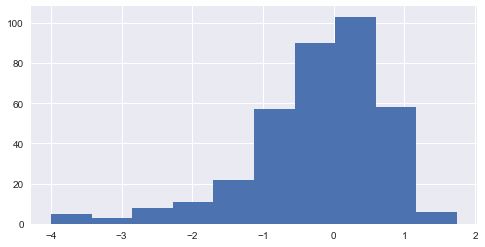

In [23]:
# Checking distribution of Temperature:

plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Temperature (F)"]).hist()

Text(0.5,1,'GasCum vs Temperature')

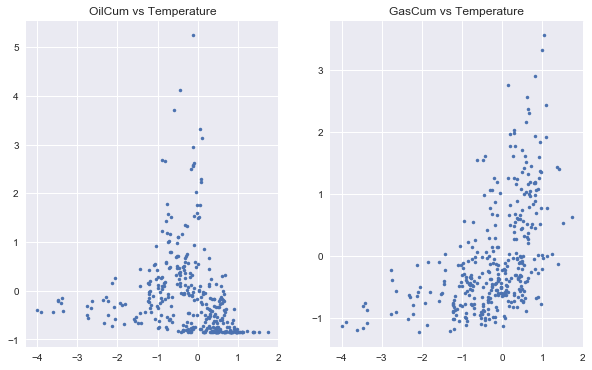

In [26]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.plot(dfSep["Temperature (F)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum vs Temperature")
ax2.plot(dfSep["Temperature (F)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum vs Temperature")

Text(0.5,1,'IQR = 1.5')

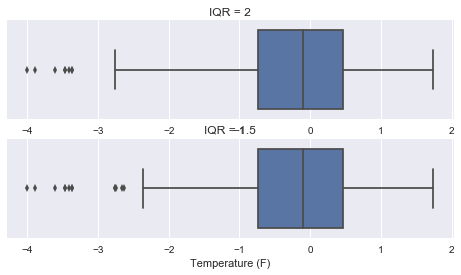

In [38]:
plt.figure(figsize = (10, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Temperature (F)"],whis=2,ax=ax1)
ax1.set_title('IQR = 2')
sns.boxplot(dfSep["Temperature (F)"],whis=1.5,ax=ax2)
ax2.set_title('IQR = 1.5')

In [37]:
outliers(dfSep,"Temperature (F)",2)

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
17,250,1.355337,-1.747261,12/07/2013,19/12/2013,22/01/2014,-1.404850,1.404330,-0.215586,0.786602,...,0.118169,NaN,-1.678896,-1.123012,-1.136871,0.362343,-0.324857,-0.286218,-1.075482,-0.444920
45,1,1.292105,-1.633644,26/02/2013,09/05/2013,25/07/2013,0.104185,1.251648,0.053982,0.569442,...,0.488483,-1.371269,-0.622318,-1.952758,-0.773433,0.924226,-0.525905,0.492295,-0.808820,-0.201637
47,565,1.301594,-1.753181,29/06/2012,19/10/2012,02/03/2013,-1.327687,1.418586,-0.043403,0.799419,...,0.474027,-2.003455,-1.946331,-2.622979,0.667339,-0.560750,-0.465284,2.392051,-1.130963,-0.390576
167,409,1.224108,-2.063141,01/03/2012,30/03/2012,03/12/2012,-1.295328,1.962448,0.197560,0.396015,...,0.518379,-1.514176,-2.558298,-1.537101,-0.293176,-1.303237,-0.795757,1.836173,-1.161723,-0.198477
234,423,1.241227,-2.073282,31/12/2011,30/03/2012,29/11/2012,-1.113621,1.962044,0.170324,0.393919,...,0.501821,-1.747549,-2.149227,-2.551795,-0.293176,-1.303237,-1.301776,2.146953,-1.195799,-0.446816
296,95,1.227731,-1.731122,12/05/2013,01/07/2013,06/09/2013,0.123476,1.416381,0.167347,0.763306,...,0.320582,-1.171674,-0.716307,-1.806237,-0.773433,0.924226,-0.577299,-0.146234,-0.878078,-0.158667
315,357,1.216789,-1.773169,06/03/2013,17/04/2013,02/08/2013,-1.257991,1.496139,0.177175,0.789375,...,0.556849,-1.680553,-1.227862,-2.629323,0.187082,2.409201,-0.469974,-0.152256,-1.079352,-0.410797
327,290,1.301884,-1.607345,26/03/2013,24/04/2013,20/07/2013,-0.514364,1.220558,0.050063,0.488219,...,0.607488,-1.565541,-1.305854,-1.824224,0.187082,2.409201,-0.519639,-0.110520,-0.755285,-0.256612


## Temp_Anomaly (F)

In [40]:
# Missing values

dfSep["Temp_Anomaly (F)"].isnull().sum()

0

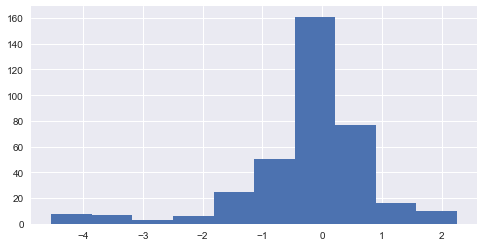

In [54]:
# Checking distribution of Temp_Anomaly:

plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Temp_Anomaly (F)"]).hist()

Text(0.5,1,'GasCum vs Temp_Anomaly ')

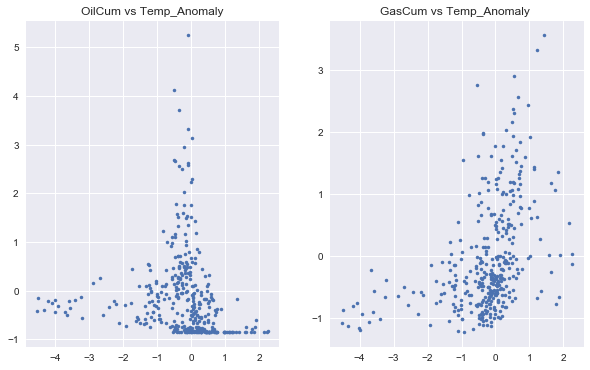

In [43]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.plot(dfSep["Temp_Anomaly (F)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum vs Temp_Anomaly")
ax2.plot(dfSep["Temp_Anomaly (F)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum vs Temp_Anomaly ")

Text(0.5,1,'IQR = 1.5')

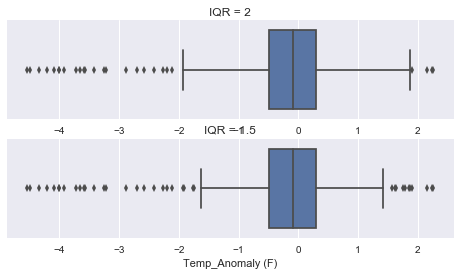

In [44]:
plt.figure(figsize = (10, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Temp_Anomaly (F)"],whis=2,ax=ax1)
ax1.set_title('IQR = 2')
sns.boxplot(dfSep["Temp_Anomaly (F)"],whis=1.5,ax=ax2)
ax2.set_title('IQR = 1.5')

In [45]:
outliers(dfSep,"Temp_Anomaly (F)",2)

,API,Surf_X,Surf_Y,Date_Drilling,Date_Completion,Date_Production,Lateral_Length (ft),Depth_TVD_PPLS (ft),Erosion_PPLS (ft),Pressure_PPLS (PSI),...,Min_Rate_Slurry (bpm),ShutInPressure_Fil (KPa),ShutInPressure_Initial (KPa),ISIP (KPa),Shot_Density (shots/ft),Shot_Total,Proppant_per_ft (kg/ft),Stage_Spacing (ft),GasCum360,OilCum360
16,361,0.992658,-1.282477,10/05/2014,03/11/2014,20/01/2015,0.126587,1.033214,0.508173,0.281561,...,-0.843141,0.946055,0.368202,0.556566,1.605516,0.164471,2.095524,-1.238962,-0.588088,-0.343815
17,250,1.355337,-1.747261,12/07/2013,19/12/2013,22/01/2014,-1.404850,1.404330,-0.215586,0.786602,...,0.118169,NaN,-1.678896,-1.123012,-1.136871,0.362343,-0.324857,-0.286218,-1.075482,-0.444920
27,50,1.086899,-1.622292,22/05/2014,24/10/2014,14/01/2015,0.043201,1.401069,0.369352,0.713677,...,-1.088667,0.937169,0.492347,0.842684,0.667339,0.163629,1.947916,-1.205387,-0.659690,-0.126440
45,1,1.292105,-1.633644,26/02/2013,09/05/2013,25/07/2013,0.104185,1.251648,0.053982,0.569442,...,0.488483,-1.371269,-0.622318,-1.952758,-0.773433,0.924226,-0.525905,0.492295,-0.808820,-0.201637
46,550,1.176209,-1.492107,28/03/2013,14/04/2013,06/08/2013,-0.735274,1.114680,0.480374,0.276190,...,0.539077,-1.186651,-0.771964,-1.785441,-1.253690,0.181738,-0.516878,1.030130,-0.944860,-0.319171
47,565,1.301594,-1.753181,29/06/2012,19/10/2012,02/03/2013,-1.327687,1.418586,-0.043403,0.799419,...,0.474027,-2.003455,-1.946331,-2.622979,0.667339,-0.560750,-0.465284,2.392051,-1.130963,-0.390576
55,736,1.726695,-1.052039,16/03/2013,06/05/2013,07/03/2014,-0.433467,0.409129,0.116984,-2.033299,...,0.651838,-1.684559,-1.721357,-2.376652,-0.773433,0.924226,-0.532775,-0.174536,0.522453,-0.846812
62,81,1.009601,-1.298381,07/08/2012,15/10/2012,31/12/2012,-0.735896,1.038867,0.538884,0.248897,...,0.243790,0.093793,-1.357932,0.044760,0.667339,-0.560750,0.941815,2.205136,-0.798361,-0.500528
72,742,1.189746,-1.388044,13/11/2014,24/01/2015,15/04/2015,0.465731,0.996255,0.625033,-0.129289,...,-0.642281,1.460048,0.988143,0.701610,0.667339,-0.560750,-0.481070,-0.237445,-0.223178,-0.503688
90,277,1.913070,-1.574677,30/04/2014,12/09/2014,07/11/2014,-0.506274,0.952028,0.823053,0.126780,...,-0.029738,-1.310839,-1.457747,-2.243103,0.667339,-0.560750,-0.620011,-0.104694,0.015422,-0.592154


## S3Tect_PPLS (PSI)

In [46]:
# Missing values 

dfSep["S3Tect_PPLS (PSI)"].isnull().sum()

0

Text(0.5,1,'GasCum vs S3Tect_PPLS (PSI)')

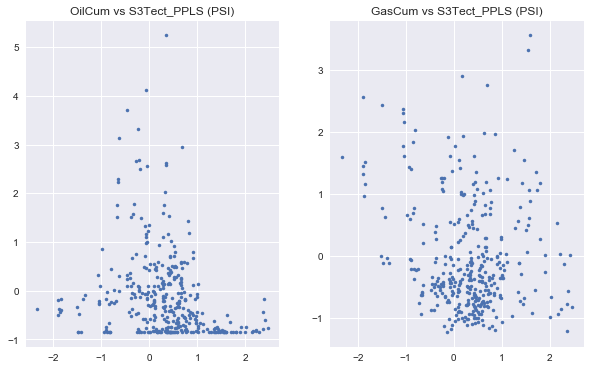

In [48]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.plot(dfSep["S3Tect_PPLS (PSI)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum vs S3Tect_PPLS (PSI)")
ax2.plot(dfSep["S3Tect_PPLS (PSI)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum vs S3Tect_PPLS (PSI)")

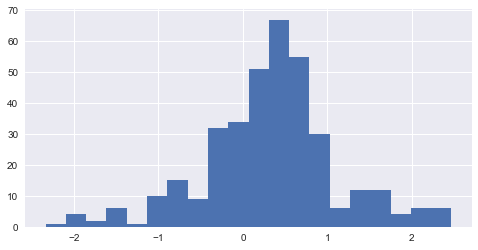

In [52]:
# Checking distribution of S3Tect_PPLS:

plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["S3Tect_PPLS (PSI)"]).hist(bins=20)

Text(0.5,1,'IQR = 2')

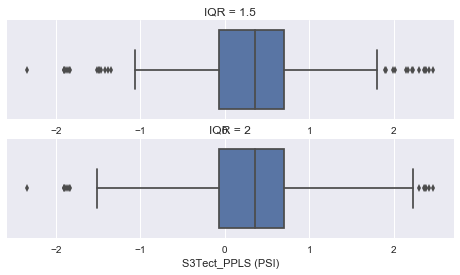

In [55]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["S3Tect_PPLS (PSI)"],whis=1.5,ax=ax1)
ax1.set_title('IQR = 1.5')
sns.boxplot(dfSep["S3Tect_PPLS (PSI)"],whis=2,ax=ax2)
ax2.set_title('IQR = 2')

In [62]:
o3 = outliers(dfSep,"S3Tect_PPLS (PSI)",2)
o3[["API","S3Tect_PPLS (PSI)"]]

,API,S3Tect_PPLS (PSI)
35,108,-1.900288
39,185,2.368697
56,255,-2.336294
90,277,2.421440
96,629,2.386987
104,143,2.361581
130,307,2.214436
195,562,-1.891932
218,118,2.469545
227,169,-1.842923


We replace outliers by mean:

In [63]:
replace_by_mean(dfSep,"S3Tect_PPLS (PSI)",o3)

## S3_contrast_PPLS (PSI)

In [65]:
# Missing values

dfSep["S3_contrast_PPLS (PSI)"].isnull().sum()

0

Text(0.5,1,'GasCum vs S3_contrast_PPLS (PSI)')

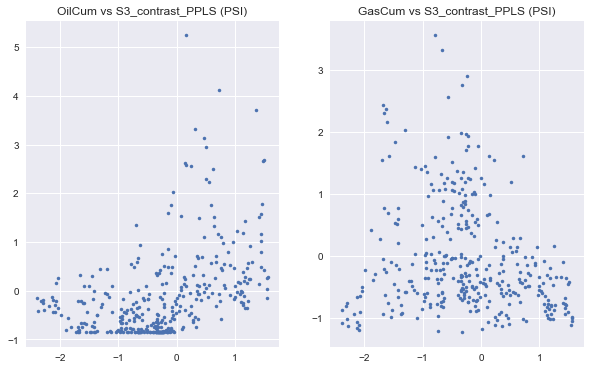

In [68]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.plot(dfSep["S3_contrast_PPLS (PSI)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum vs S3_contrast_PPLS (PSI)")
ax2.plot(dfSep["S3_contrast_PPLS (PSI)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum vs S3_contrast_PPLS (PSI)")

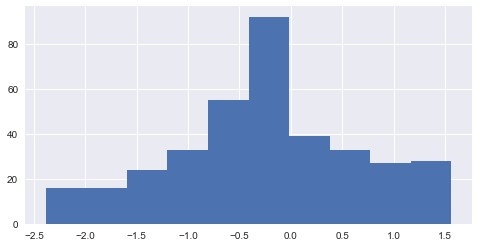

In [70]:
# Checking distribution of S3_contrast_PPLS (PSI):

plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["S3_contrast_PPLS (PSI)"]).hist()

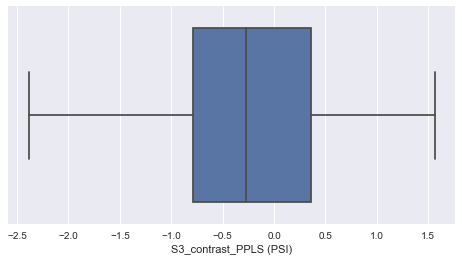

In [72]:
sns.boxplot(dfSep["S3_contrast_PPLS (PSI)"],whis=2)

No outliers and no clear dependence between this variable and oil/gas.

## Heat_Flow (W/m2)

In [73]:
# Missing values

dfSep["Heat_Flow (W/m2)"].isnull().sum()

0

Text(0.5,1,'GasCum vs Heat_Flow')

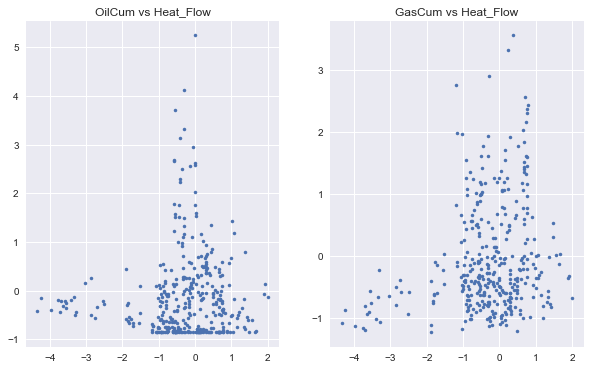

In [74]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.plot(dfSep["Heat_Flow (W/m2)"], dfSep.OilCum360,'.')
ax1.set_title("OilCum vs Heat_Flow")
ax2.plot(dfSep["Heat_Flow (W/m2)"], dfSep.GasCum360,'.')
ax2.set_title("GasCum vs Heat_Flow")

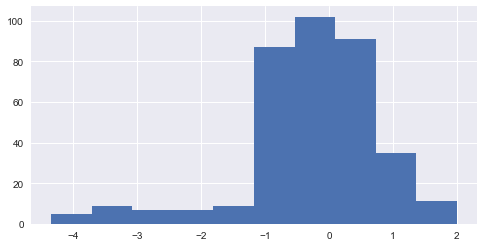

In [75]:
# Checking distribution of Heat_Flow:

plt.rcParams['figure.figsize'] = (8.0,4.0)
(dfSep["Heat_Flow (W/m2)"]).hist()

Text(0.5,1,'IQR = 1.5')

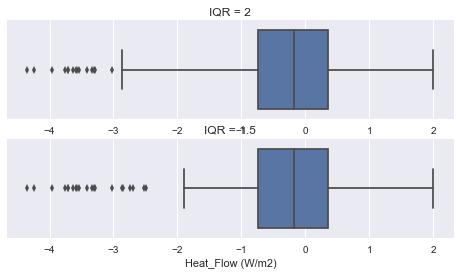

In [76]:
plt.figure(figsize = (16, 6))
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(dfSep["Heat_Flow (W/m2)"],whis=2,ax=ax1)
ax1.set_title('IQR = 2')
sns.boxplot(dfSep["Heat_Flow (W/m2)"],whis=1.5,ax=ax2)
ax2.set_title('IQR = 1.5')

In [78]:
oHF = outliers(dfSep,"Heat_Flow (W/m2)",2)
oHF[["API","Heat_Flow (W/m2)"]]

,API,Heat_Flow (W/m2)
17,250,-3.283776
27,50,-3.343225
45,1,-3.703262
46,550,-3.637605
47,565,-3.964455
62,81,-2.859993
72,742,-3.304786
111,685,-3.408165
113,31,-3.581737
167,409,-3.760562


We replace outliers by mean:

In [79]:
replace_by_mean(dfSep,"Heat_Flow (W/m2)",oHF)